**Web scrapping**



In [1]:
import requests
from bs4 import BeautifulSoup
from trafilatura import feeds, fetch_url, extract
import pandas as pd
import numpy as np
import matplotlib as plt
import re
import plotly

In [2]:
with open("links_reviews.txt","r") as all_urls:
    lines = all_urls.readlines()
    #print(lines)
lines_links =[]
for line in lines:
    lines_links.append(line.removesuffix('\n'))

In [3]:
raw_reviews2 = pd.read_csv("raw_reviews.csv")

In [4]:
raw_reviews2 = pd.DataFrame(data=raw_reviews2["description"])
raw_reviews2

,description
0,"|Roaster Location:\n|San Diego, California\n|C..."
1,Bridge Coffee Co.\nBowstring Christmas Blend\n...
2,"|Roaster Location:\n|San Diego, California\n|C..."
3,"|Roaster Location:\n|Glendale, California\n|Co..."
4,"|Roaster Location:\n|Floyd, Virginia\n|Coffee ..."
...,...
1996,"|Roaster Location:\n|Chia-Yi, Taiwan\n|Coffee ..."
1997,"|Roaster Location:\n|San Diego, California\n|C..."
1998,"|Roaster Location:\n|San Rafael, California\n|..."
1999,"|Roaster Location:\n|Sacramento, California\n|..."


In [5]:
reviews= pd.DataFrame(columns = ["Blind_Assessment","Origin"])
pattern = "[^0-9a-zA-Z\s]+"
for j in range(len(raw_reviews2)):
    if j != 1009 :
        d=raw_reviews2['description'][j]
        split_review= d.split()
       # print(split_review)
        og_star = split_review.index('Origin:')+1
        og_end = split_review.index("|Roast")
        ba_star = split_review.index('Assessment')+1
        ba_end = split_review.index('Notes')
        origin = split_review[og_star:og_end]
        origin = origin[len(origin)-1]
        origin_str = origin.lower()
        origin = re.sub(pattern, "", origin_str)
        blind_assessment = split_review[ba_star:ba_end]
        blind_assessment = ' '.join(blind_assessment).lower()
        reviews.loc[j]= [blind_assessment, origin]

In [6]:
reviews # check all is in lower cases and no symbols on the origin country

,Blind_Assessment,Origin
0,"deeply sweet, richly savory. baking chocolate,...",sumatra
1,"sweet-toned, chocolaty. baking chocolate, date...",america
2,"delicately fruit-forward, suave, intricate. pl...",colombia
3,"roasty-sweet, crisply chocolaty. baking chocol...",mexico
4,"balanced, deep, sweetly savory. tamarind, dark...",salvador
...,...,...
1996,"high-toned, fruit-driven. mulberry, cocoa nib,...",ethiopia
1997,"juicy-sweet, fruit-driven. lychee, tea rose, s...",colombia
1998,"richly chocolaty, deeply sweet. dark chocolate...",salvador
1999,"evaluated as espresso. rich-toned, deeply choc...",guatemala


<Axes: xlabel='Origin'>

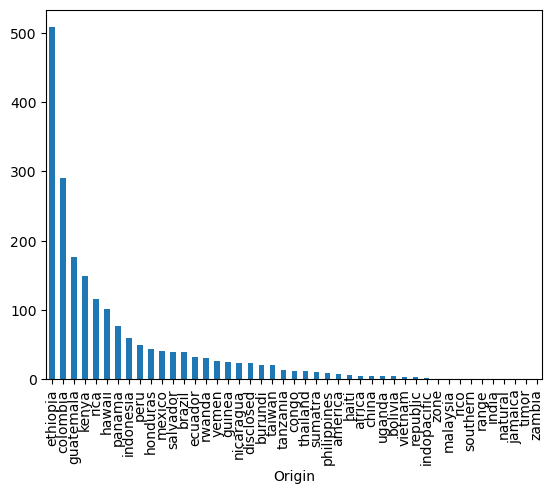

In [7]:
reviews["Origin"].value_counts().plot(kind="bar")

In [8]:
reviews['Origin'].unique()

array(['sumatra', 'america', 'colombia', 'mexico', 'salvador', 'burundi',
       'ethiopia', 'guatemala', 'ecuador', 'rica', 'peru', 'kenya',
       'brazil', 'hawaii', 'honduras', 'yemen', 'nicaragua', 'china',
       'panama', 'thailand', 'guinea', 'indonesia', 'taiwan', 'vietnam',
       'tanzania', 'rwanda', 'philippines', 'bolivia', 'disclosed',
       'haiti', 'republic', 'rico', 'congo', 'zone', 'uganda', 'zambia',
       'malaysia', 'africa', 'southern', 'range', 'india', 'natural',
       'jamaica', 'timor', 'indopacific'], dtype=object)

In [9]:
reviews[reviews.Origin == 'disclosed'] # Delete all not origin disclosed
reviews[reviews.Origin == 'rico'] #puerto rico
reviews[reviews.Origin == 'america'] #delete all, blends
reviews[reviews.Origin == 'indopacific'] #1740 blend delete, # 1808 blend delete, blends
reviews[reviews.Origin == 'zone'] # Ethiopia
reviews[reviews.Origin == 'range'] #salvador
reviews[reviews.Origin == 'africa']# 845 blend South Africa, 1321 SouthAfrica, 1622 Blend #Delete, 1779 Africa blend, 1959 Africa blend

,Blind_Assessment,Origin
845,"crisply chocolaty, sweetly nut-toned. baking c...",africa
1321,"richly bittersweet, deep-toned. hop flowers, p...",africa
1622,"evaluated as espresso. chocolate fudge, pomegr...",africa
1779,"richly fruit-toned, balanced and multi-layered...",africa
1959,"evaluated as espresso. chocolaty, fruity, nutt...",africa


In [10]:
reviews[reviews.Origin == 'range'] #1 blend delete , 568 blend delete, 1440 delete, 1523 delete, 1524 delete, 1720 delete, 1926 delete, 1947 delete

,Blind_Assessment,Origin
1043,"delicately sweet-tart, fruit-forward. dried ap...",range


In [11]:
lines_links[1947] 

'https://www.coffeereview.com/review/pikes-place-blend/'

For what have been seen in the cleaning of the data is that there are some coffees with the disclosed label, will not be used
There is also some blends coffees, these are not single origin, which means that it gathered coffess from different places. The variety of coffees can go from 2 to even 4 different places. For the main purpose of this project
these coffees will be removed, blend are commonly use in specialty coffee but it will not reflect the flavor characteristics of a single region, which will make more complex to classified them based on the blind assessment. 
A further project could be to see if mixing the single origin reviews could create blind assessment that could correspond of a blend coffee with this origins.

In [12]:
reviews3=reviews[reviews.Origin!= ('disclosed' or 'america' or 'indopacific')]
reviews3= reviews3[reviews3.Origin!= 'america']
reviews3=reviews3[reviews3.Origin!= 'indopacific']
reviews3.loc[1321]['Origin'] = 'southafrica'
reviews3.loc[402]['Origin'] = 'ethiopia'
reviews3.loc[1043]['Origin'] = 'salvador'
reviews3.loc[213]['Origin'] = 'dominicanrepublic'
reviews3.loc[709]['Origin'] = 'dominicanrepublic'
reviews3.loc[1039]['Origin'] = 'ethiopia'
reviews3.loc[1105]['Origin'] = 'ethiopia'
reviews3.loc[244]['Origin'] = 'puertorico'
reviews3=reviews3[reviews3.Origin!= 'africa']
reviews3=reviews3[reviews3.Origin!= 'republic']
reviews3['Origin'] = reviews3['Origin'].replace({'rica': 'costarica'}, regex=True)
single_origin=reviews3
single_origin['Origin'].unique()

array(['sumatra', 'colombia', 'mexico', 'salvador', 'burundi', 'ethiopia',
       'guatemala', 'ecuador', 'costarica', 'peru', 'kenya', 'brazil',
       'hawaii', 'honduras', 'yemen', 'nicaragua', 'china', 'panama',
       'thailand', 'guinea', 'indonesia', 'taiwan', 'vietnam', 'tanzania',
       'rwanda', 'philippines', 'bolivia', 'haiti', 'dominicanrepublic',
       'puertorico', 'congo', 'uganda', 'zambia', 'malaysia', 'india',
       'jamaica', 'southafcostarica', 'timor'], dtype=object)

<Axes: title={'center': 'Number of Blind Assessments per Origin (Country)'}, xlabel='Origin', ylabel='Number of Blind Assessments'>

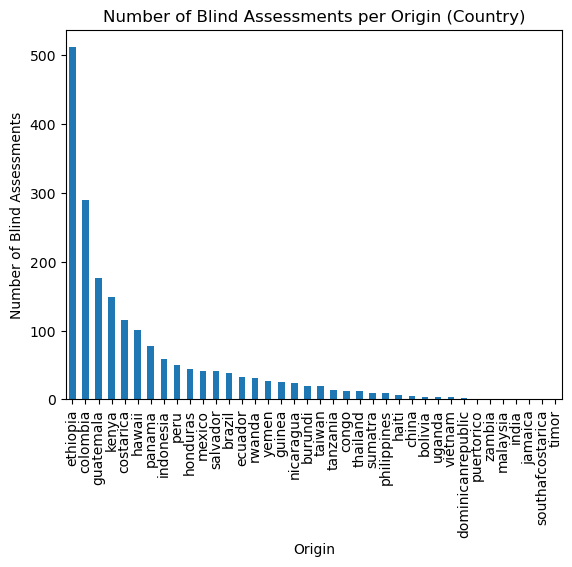

In [14]:
number_ba_c= single_origin['Origin'].value_counts()
single_origin_plot = single_origin["Origin"].value_counts().plot(kind="bar")
single_origin_plot.set_ylabel("Number of Blind Assessments")
single_origin_plot.set_title('Number of Blind Assessments per Origin (Country)')
single_origin_plot

In [15]:
percentage = pd.DataFrame(columns=['Origin', 'Count' ,'Percentage', 'Cumulative_Contribution'])
percentage['Origin'] = single_origin['Origin'].value_counts().index
percentage['Count'] =  single_origin['Origin'].value_counts().values
percentage['Percentage'] = (100*single_origin['Origin'].value_counts().values)/sum(single_origin['Origin'].value_counts().values)
percentage['Percentage'] = round(percentage['Percentage'],4)
percentage['Cumulative_Contribution'] = np.cumsum(percentage['Percentage'])
percentage

,Origin,Count,Percentage,Cumulative_Contribution
0,ethiopia,511,26.0581,26.0581
1,colombia,290,14.7884,40.8465
2,guatemala,176,8.9750,49.8215
3,kenya,149,7.5982,57.4197
4,costarica,116,5.9153,63.3350
5,hawaii,101,5.1504,68.4854
6,panama,77,3.9266,72.4120
7,indonesia,59,3.0087,75.4207
8,peru,50,2.5497,77.9704
9,honduras,44,2.2438,80.2142


<Axes: title={'center': 'Contribution of Blind Assessment per Origin (Country)'}, ylabel='Percentage'>

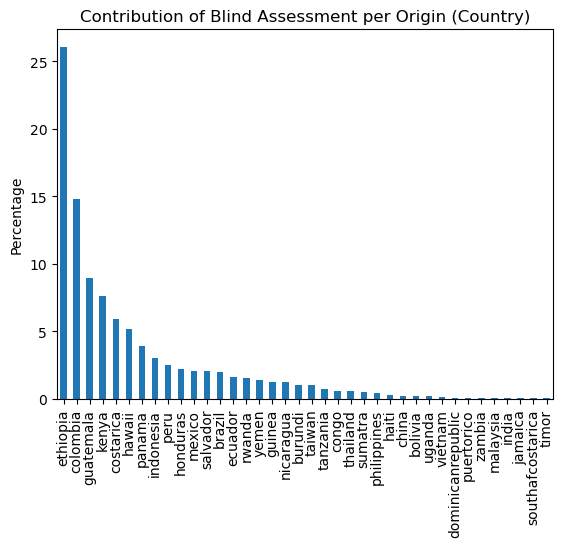

In [17]:
percentage_plot =percentage['Percentage'].plot(kind='bar')
percentage_plot.set_ylabel("Percentage")
percentage_plot.set_title('Contribution of Blind Assessment per Origin (Country)')
percentage_plot.set_xticklabels( percentage['Origin'] )
percentage_plot

From figure 1.2  it can be seen that more than 25 % of reviews come from Ethiopia, followed by Colombia with 15%, Guatemala with 8.9%, Kenya with 7.5 % and Costa Rica with 5.9%.
By taking these countries as the Top 5 of Countries Origin with most reviews; from Figure 1.3 it can be conclude that these 5 countries represent 57% of the reviews. Furthermore,
taking into account the countries from Top 8, these represent 75% of reviews and taking the top 16 countries reflects 90 % of the reviews. Considering that the dataset have blind 
assessments from 37 countries, it can be concluded that the dataset is imbalanced.

Some of the countries only contribute to the dataset with 1 review equivalent to 0.0510 % of the whole dataset. The first approach was to take into account these coffees descriptions,
but this would have implied that when the data is divided into training and test data, then some of these 1 single review coffees would end in one of the data sets. If it ends in the
training dataset there will not be any reviews to test it and if it ended on the test dataset it would have produced an error and downgrade the overall performance of the classifiers
because these will not be trained to classified this coffee Origin. 

In [18]:
single_origin.to_csv('single_origin_coffees.csv',encoding='utf-8')

In [19]:
origin_counts=single_origin['Origin'].value_counts()
og_single= origin_counts[origin_counts>1].index
og_single

Index(['ethiopia', 'colombia', 'guatemala', 'kenya', 'costarica', 'hawaii',
       'panama', 'indonesia', 'peru', 'honduras', 'mexico', 'salvador',
       'brazil', 'ecuador', 'rwanda', 'yemen', 'guinea', 'nicaragua',
       'burundi', 'taiwan', 'tanzania', 'congo', 'thailand', 'sumatra',
       'philippines', 'haiti', 'china', 'bolivia', 'uganda', 'vietnam',
       'dominicanrepublic'],
      dtype='object', name='Origin')

<Axes: title={'center': 'Number of Blind Assessments per Origin (Country)'}, xlabel='Origin', ylabel='Number of Blind Assessments'>

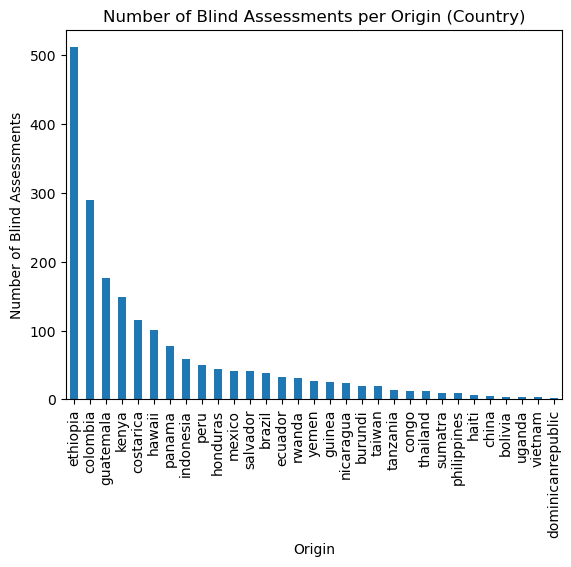

In [20]:
filtered_df = single_origin[single_origin['Origin'].isin(og_single)] #
filtered_df_plot = filtered_df['Origin'].value_counts().plot(kind='bar')
filtered_df_plot.set_ylabel("Number of Blind Assessments")
filtered_df_plot.set_title('Number of Blind Assessments per Origin (Country)')

percentage_filtered = pd.DataFrame(columns=['Origin', 'Count' ,'Percentage', 'Cumulative_Contribution'])
percentage_filtered['Origin'] = filtered_df['Origin'].value_counts().index
percentage_filtered['Count'] =  filtered_df['Origin'].value_counts().values
percentage_filtered['Percentage'] = (100*filtered_df['Origin'].value_counts().values)/sum(filtered_df['Origin'].value_counts().values)
percentage_filtered['Percentage'] = round(percentage_filtered['Percentage'],4)
percentage_filtered['Cumulative_Contribution'] = np.cumsum(percentage_filtered['Percentage'])

filtered_df_plot

<Axes: title={'center': 'Contribution of Blind Assessment per Origin (Country)'}, ylabel='Percentage'>

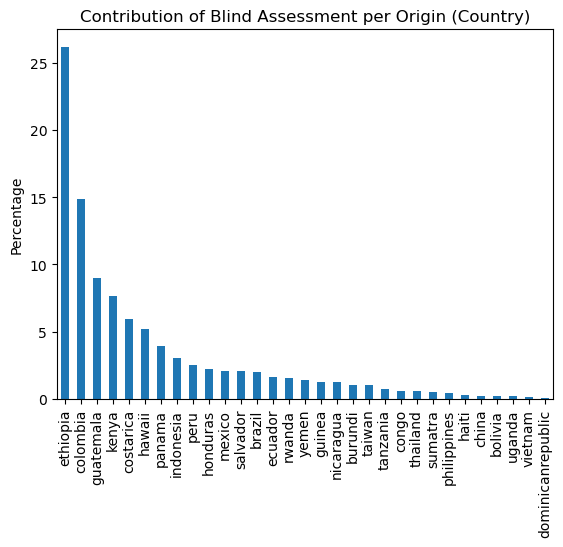

In [21]:
percentage_fplot =percentage_filtered['Percentage'].plot(kind='bar')
percentage_fplot.set_ylabel("Percentage")
percentage_fplot.set_title('Contribution of Blind Assessment per Origin (Country)')
percentage_fplot.set_xticklabels( percentage_filtered['Origin'] )
percentage_fplot

In [22]:
print(percentage_filtered, "\n")

len(filtered_df)

               Origin  Count  Percentage  Cumulative_Contribution
0            ethiopia    511     26.1515                  26.1515
1            colombia    290     14.8414                  40.9929
2           guatemala    176      9.0072                  50.0001
3               kenya    149      7.6254                  57.6255
4           costarica    116      5.9365                  63.5620
5              hawaii    101      5.1689                  68.7309
6              panama     77      3.9406                  72.6715
7           indonesia     59      3.0194                  75.6909
8                peru     50      2.5589                  78.2498
9            honduras     44      2.2518                  80.5016
10             mexico     41      2.0983                  82.5999
11           salvador     41      2.0983                  84.6982
12             brazil     39      1.9959                  86.6941
13            ecuador     32      1.6377                  88.3318
14        

1954

The decision was to eliminate the 1 single coffee reviews from the data set. The final data set has 1954 reviews from 30 different countries.



### Training Models
#### Preprocess of blind assessements

In [23]:
filtered_df.Blind_Assessment.loc[100]

'evaluated as espresso. crisply sweet, chocolaty. baking chocolate, date, banana, vanilla, fir in aroma and small cup. velvety-smooth body; gently drying, wood-framed finish. crisply chocolaty with fir undertones in three parts milk.'

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.svm import NuSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
import spacy
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

Remove punctuation and stop words with spacy from each blind assessment.

In [25]:
filtered_df.index = range(len(filtered_df))

In [26]:
df1= pd.DataFrame(columns=["Blind_Assessment", "Origin"])
for ba in range(len(filtered_df)):
    doc=nlp(filtered_df.Blind_Assessment.loc[ba])
    filtered_tokens =[token for token in doc if not token.is_stop]
    alpha_tokens = [token.text for token in filtered_tokens if token.is_alpha]
    text = " ".join(alpha_tokens)
    df1.at[ba, "Blind_Assessment"] = text 
    df1.at[ba, "Origin"]= filtered_df.Origin.loc[ba]

Check that the preprocess was done correctly, by printing blind assessent 100 from filtered_df and df1; and compare.

In [27]:
filtered_df.Blind_Assessment.loc[100]

'sweetly tart, deeply aromatic. red currant, magnolia, brown sugar, cashew butter, lemon verbena in aroma and cup. sweet-tart structure with gentle, round acidity; very full, syrupy-smooth mouthfeel. the quiet finish leads with notes of red currant and cashew butter.'

In [28]:
df1.Blind_Assessment.loc[100]

'sweetly tart deeply aromatic red currant magnolia brown sugar cashew butter lemon verbena aroma cup sweet tart structure gentle round acidity syrupy smooth mouthfeel quiet finish leads notes red currant cashew butter'

In [30]:
ba_train, ba_test , og_train, og_test= train_test_split(df1["Blind_Assessment"],df1["Origin"], test_size=0.35, random_state=44)

In [33]:
pipeDummy = Pipeline([('vectorizer', CountVectorizer()),('dummyRandom', DummyClassifier(strategy= 'stratified'))])
pipeDummy.fit(ba_train,og_train)
y_true = og_test
y_predDummy = pipeDummy.predict(ba_test)

print(classification_report(y_true, y_predDummy))

                   precision    recall  f1-score   support

          bolivia       0.00      0.00      0.00         2
           brazil       0.00      0.00      0.00        17
          burundi       0.00      0.00      0.00         9
            china       0.00      0.00      0.00         1
         colombia       0.15      0.17      0.16        94
            congo       0.00      0.00      0.00         5
        costarica       0.10      0.09      0.10        44
dominicanrepublic       0.00      0.00      0.00         0
          ecuador       0.00      0.00      0.00        15
         ethiopia       0.27      0.28      0.27       178
        guatemala       0.11      0.09      0.10        69
           guinea       0.00      0.00      0.00         8
            haiti       0.00      0.00      0.00         3
           hawaii       0.04      0.03      0.03        40
         honduras       0.00      0.00      0.00        18
        indonesia       0.00      0.00      0.00       

C:\Users\act_9\miniconda3\envs\liu-text-mining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\act_9\miniconda3\envs\liu-text-mining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\act_9\miniconda3\envs\liu-text-mining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

In [34]:
#ba_train, ba_test , og_train, og_test= train_test_split(df1["Blind_Assessment"],df1["Origin"], test_size=0.35, random_state=44)
pipeNB = Pipeline([("vectorizer", TfidfVectorizer()),("mNB",MultinomialNB())])

parametersNB = {
    "vectorizer__binary":(True, False),
    "vectorizer__ngram_range":[(1,1),(2,2)],
    "mNB__alpha": [0.1,0.2,0.3,1] 
}

searchNB = GridSearchCV(pipeNB,parametersNB, cv=2)
searchNB.fit(ba_train,og_train)
y_true = og_test
y_predNB= searchNB.predict(ba_test)
print(classification_report(y_true, y_predNB))
print(searchNB.best_score_, searchNB.best_estimator_, searchNB.best_params_)

              precision    recall  f1-score   support

     bolivia       0.00      0.00      0.00         2
      brazil       0.00      0.00      0.00        17
     burundi       0.00      0.00      0.00         9
       china       0.00      0.00      0.00         1
    colombia       0.26      0.28      0.27        94
       congo       0.00      0.00      0.00         5
   costarica       0.29      0.05      0.08        44
     ecuador       0.00      0.00      0.00        15
    ethiopia       0.33      0.87      0.48       178
   guatemala       0.25      0.20      0.23        69
      guinea       0.00      0.00      0.00         8
       haiti       0.00      0.00      0.00         3
      hawaii       0.00      0.00      0.00        40
    honduras       0.00      0.00      0.00        18
   indonesia       0.47      0.47      0.47        15
       kenya       0.62      0.40      0.48        53
      mexico       0.00      0.00      0.00         9
   nicaragua       0.00    

C:\Users\act_9\miniconda3\envs\liu-text-mining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\act_9\miniconda3\envs\liu-text-mining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\act_9\miniconda3\envs\liu-text-mining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [28]:
pipeNuSVC = Pipeline([("vectorizer", TfidfVectorizer()),("NuSVC",NuSVC())])

parametersNuSVC = {
    "vectorizer__binary":(True, False),
    "vectorizer__ngram_range":[(1,1),(2,2)],
    "NuSVC__nu": [0.001,0.01],
    "NuSVC__kernel": ['rbf','poly']
}

searchNuSVC = GridSearchCV(pipeNuSVC,parametersNuSVC, cv=2)
searchNuSVC.fit(ba_train,og_train)
y_true = og_test
y_predNuSVC= searchNuSVC.predict(ba_test)
print(classification_report(y_true, y_predNuSVC))
print(searchNuSVC.best_score_, searchNuSVC.best_estimator_, searchNuSVC.best_params_)

              precision    recall  f1-score   support

     bolivia       0.00      0.00      0.00         2
      brazil       1.00      0.06      0.11        17
     burundi       0.00      0.00      0.00         9
       china       0.00      0.00      0.00         1
    colombia       0.20      0.37      0.26        94
       congo       0.00      0.00      0.00         5
   costarica       0.14      0.02      0.04        44
     ecuador       0.00      0.00      0.00        15
    ethiopia       0.37      0.78      0.50       178
   guatemala       0.22      0.16      0.18        69
      guinea       0.00      0.00      0.00         8
       haiti       0.00      0.00      0.00         3
      hawaii       0.22      0.05      0.08        40
    honduras       0.00      0.00      0.00        18
   indonesia       0.40      0.40      0.40        15
       kenya       0.74      0.55      0.63        53
      mexico       0.20      0.11      0.14         9
   nicaragua       0.00    

C:\Users\act_9\miniconda3\envs\liu-text-mining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\act_9\miniconda3\envs\liu-text-mining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\act_9\miniconda3\envs\liu-text-mining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [35]:
origin_counts5=df1['Origin'].value_counts()
og5= origin_counts5[origin_counts5>4].index
og10 = origin_counts5[origin_counts5>50].index
print(og5.shape,"\n", og10.shape) #27, 19
df1_2 = df1[df1['Origin'].isin(og10)] #

(27,) 
 (8,)


In [36]:
from sklearn.model_selection import StratifiedShuffleSplit 
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=52)
splitter.get_n_splits(df1_2['Blind_Assessment'], df1_2['Origin'])

for train,test in  splitter.split(df1_2['Blind_Assessment'], df1_2['Origin']):
    X_train_SS = df1_2['Blind_Assessment'].iloc[train]
    y_train_SS = df1_2['Origin'].iloc[train]
    X_test_SS = df1_2['Blind_Assessment'].iloc[test]
    y_test_SS = df1_2['Origin'].iloc[test]


In [37]:
print(y_train_SS.value_counts())  
print(y_test_SS.value_counts())

Origin
ethiopia     409
colombia     232
guatemala    141
kenya        119
costarica     93
hawaii        81
panama        61
indonesia     47
Name: count, dtype: int64
Origin
ethiopia     102
colombia      58
guatemala     35
kenya         30
costarica     23
hawaii        20
panama        16
indonesia     12
Name: count, dtype: int64


In [38]:
pipeDummy = Pipeline([('vectorizer', CountVectorizer()),('dummyRandom', DummyClassifier(strategy= 'stratified'))])
pipeDummy.fit(X_train_SS,y_train_SS)
y_true = y_test_SS
y_predDummy = pipeDummy.predict(X_test_SS)

print(classification_report(y_true, y_predDummy))

              precision    recall  f1-score   support

    colombia       0.18      0.16      0.17        58
   costarica       0.12      0.13      0.13        23
    ethiopia       0.38      0.39      0.38       102
   guatemala       0.16      0.14      0.15        35
      hawaii       0.10      0.10      0.10        20
   indonesia       0.07      0.08      0.08        12
       kenya       0.12      0.13      0.13        30
      panama       0.00      0.00      0.00        16

    accuracy                           0.22       296
   macro avg       0.14      0.14      0.14       296
weighted avg       0.22      0.22      0.22       296



In [32]:
#ba_train, ba_test , og_train, og_test= train_test_split(df1_2["Blind_Assessment"],df1_2["Origin"], test_size=0.3, random_state=42)
pipeNB = Pipeline([("vectorizer", TfidfVectorizer()),("mNB",MultinomialNB())])

parametersNB = {
    "vectorizer__binary":(True, False),
    "vectorizer__ngram_range":[(1,1),(2,2)],
    "mNB__alpha": [0.1,0.2,0.3,0.5,0.7,1]
}

searchNB = GridSearchCV(pipeNB,parametersNB, cv=16)
searchNB.fit(X_train_SS,y_train_SS)
y_true = y_test_SS
y_predNB= searchNB.predict(X_test_SS)
print(classification_report(y_true, y_predNB))
print(searchNB.best_score_, searchNB.best_estimator_, searchNB.best_params_)

              precision    recall  f1-score   support

    colombia       0.45      0.26      0.33        58
   costarica       0.00      0.00      0.00        23
    ethiopia       0.40      0.91      0.56       102
   guatemala       0.42      0.14      0.21        35
      hawaii       0.00      0.00      0.00        20
   indonesia       1.00      0.08      0.15        12
       kenya       0.78      0.47      0.58        30
      panama       0.00      0.00      0.00        16

    accuracy                           0.43       296
   macro avg       0.38      0.23      0.23       296
weighted avg       0.40      0.43      0.35       296

0.4141868752313958 Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('mNB', MultinomialNB(alpha=0.2))]) {'mNB__alpha': 0.2, 'vectorizer__binary': False, 'vectorizer__ngram_range': (1, 1)}


C:\Users\act_9\miniconda3\envs\liu-text-mining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\act_9\miniconda3\envs\liu-text-mining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\act_9\miniconda3\envs\liu-text-mining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [39]:
pipeNuSVC = Pipeline([("vectorizer", TfidfVectorizer()),("NuSVC",NuSVC())])

parametersNuSVC = {
    "vectorizer__binary":(True, False),
    "vectorizer__ngram_range":[(3,3),(2,2),(1,1)],
    "NuSVC__nu": [0.001,0.01,0.002],
    "NuSVC__kernel": ['rbf','poly', 'linear', 'sigmoid']
}

searchNuSVC = GridSearchCV(pipeNuSVC,parametersNuSVC, cv=30)
searchNuSVC.fit(X_train_SS,y_train_SS)
y_true = y_test_SS
y_predNuSVC= searchNuSVC.predict(X_test_SS)
print(classification_report(y_true, y_predNuSVC))
print(searchNuSVC.best_score_, searchNuSVC.best_estimator_, searchNuSVC.best_params_)

              precision    recall  f1-score   support

    colombia       0.30      0.36      0.33        58
   costarica       0.20      0.04      0.07        23
    ethiopia       0.44      0.73      0.55       102
   guatemala       0.50      0.26      0.34        35
      hawaii       0.33      0.10      0.15        20
   indonesia       0.75      0.25      0.38        12
       kenya       0.72      0.60      0.65        30
      panama       0.00      0.00      0.00        16

    accuracy                           0.43       296
   macro avg       0.41      0.29      0.31       296
weighted avg       0.41      0.43      0.39       296

0.4294871794871795 Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('NuSVC', NuSVC(nu=0.002))]) {'NuSVC__kernel': 'rbf', 'NuSVC__nu': 0.002, 'vectorizer__binary': False, 'vectorizer__ngram_range': (1, 1)}


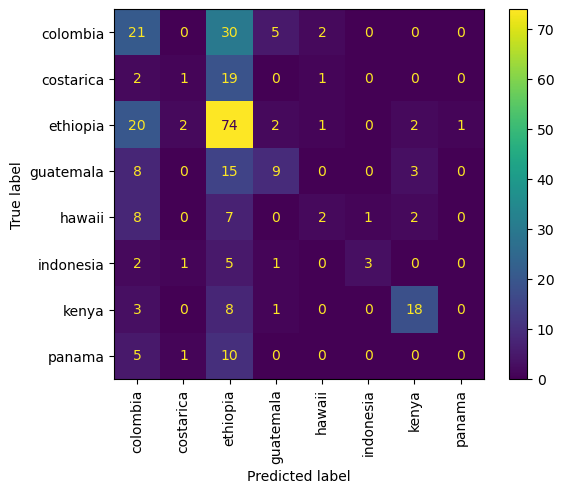

In [40]:
cm = confusion_matrix(y_true, y_predNuSVC)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = searchNuSVC.classes_)
disp.plot(xticks_rotation='vertical')


## TIDF 

The models are not performing well in general, we would like to have a F1 macro score arround 0.7 to be confident about
the capabilites of predicting the Origin of the coffee.

Another reason for the models perfroming not so great, it is that as we know our dataset is imbalanced. Ethiopia has more reviews than
any other Origin. 
    
In addition to the imalance dataset, yaking a closer look to the words with highest TFIDF from the same origin and comparing it
against others words from others origins, could explain why is so difficult to the models to achieve a higher F1 score. Probably 
some words repeat within these Origins.

The origins reviewed here are the ones who have more predictions mistaken for Ethiopia, which are : Guatemala and Colombia.

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as pltpy
#pipeVec= Pipeline(('vectorizer',  TfidfVectorizer()))
vectorizer_tfidf = TfidfVectorizer(ngram_range=(1,1))
vectors_colombia= vectorizer_tfidf.fit_transform(df1[df1['Origin']=='colombia'].Blind_Assessment.tolist())
features_words = vectorizer_tfidf.get_feature_names_out()
dense_matrix = vectors_colombia.todense()
list_dense = dense_matrix.tolist()
df_tfidf_colombia = pd.DataFrame(list_dense, columns = features_words)

vectors_guatemala= vectorizer_tfidf.fit_transform(df1[df1['Origin']=='guatemala'].Blind_Assessment.tolist())
features_words_gua = vectorizer_tfidf.get_feature_names_out()
dense_matrix_gua = vectors_guatemala.todense()
list_dense_gua = dense_matrix_gua.tolist()
df_tfidf_guatemala = pd.DataFrame(list_dense_gua, columns = features_words_gua)


vectors_ethiopia= vectorizer_tfidf.fit_transform(df1[df1['Origin']=='ethiopia'].Blind_Assessment.tolist())
features_words_eth = vectorizer_tfidf.get_feature_names_out()
dense_matrix_eth = vectors_ethiopia.todense()
list_dense_eth = dense_matrix_eth.tolist()
df_tfidf_eth = pd.DataFrame(list_dense_eth, columns = features_words_eth)

vectors_costarica= vectorizer_tfidf.fit_transform(df1[df1['Origin']=='costarica'].Blind_Assessment.tolist())
features_words_cr = vectorizer_tfidf.get_feature_names_out()
dense_matrix_cr = vectors_costarica.todense()
list_dense_cr = dense_matrix_cr.tolist()
df_tfidf_cr = pd.DataFrame(list_dense_cr, columns = features_words_cr)

vectors_hw= vectorizer_tfidf.fit_transform(df1[df1['Origin']=='hawaii'].Blind_Assessment.tolist())
features_words_hw = vectorizer_tfidf.get_feature_names_out()
dense_matrix_hw = vectors_hw.todense()
list_dense_hw = dense_matrix_hw.tolist()
df_tfidf_hw = pd.DataFrame(list_dense_hw, columns = features_words_hw)

vectors_ind= vectorizer_tfidf.fit_transform(df1[df1['Origin']=='indonesia'].Blind_Assessment.tolist())
features_words_ind = vectorizer_tfidf.get_feature_names_out()
dense_matrix_ind = vectors_ind.todense()
list_dense_ind = dense_matrix_ind.tolist()
df_tfidf_ind = pd.DataFrame(list_dense_ind, columns = features_words_ind)

vectors_kenya= vectorizer_tfidf.fit_transform(df1[df1['Origin']=='kenya'].Blind_Assessment.tolist())
features_words_kenya = vectorizer_tfidf.get_feature_names_out()
dense_matrix_kenya = vectors_kenya.todense()
list_dense_kenya = dense_matrix_kenya.tolist()
df_tfidf_kenya = pd.DataFrame(list_dense_kenya, columns = features_words_kenya)

vectors_pan= vectorizer_tfidf.fit_transform(df1[df1['Origin']=='panama'].Blind_Assessment.tolist())
features_words_pan = vectorizer_tfidf.get_feature_names_out()
dense_matrix_pan = vectors_pan.todense()
list_dense_pan = dense_matrix_pan.tolist()
df_tfidf_pan = pd.DataFrame(list_dense_pan, columns = features_words_pan)


In [174]:
df_tfidf_colombia.T.sum(axis=1).sort_values(ascending=False)
ETH_base_comparison = list(df_tfidf_eth.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10]
KNY_comparison = list(df_tfidf_kenya.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10]

TFIDF_Origins = dict(
HW_comparison = list(df_tfidf_hw.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10],
GUA_comparison = list(df_tfidf_guatemala.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10],
COL_comparison = list(df_tfidf_colombia.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10],
IND_comparison = list(df_tfidf_ind.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10],
CR_comparison = list(df_tfidf_cr.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10],
PAN_comparison = list(df_tfidf_pan.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10]       
)

TFIDF_Origins_PAN = dict(
HW_comparison = list(df_tfidf_hw.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10],
GUA_comparison = list(df_tfidf_guatemala.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10],
COL_comparison = list(df_tfidf_colombia.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10],
IND_comparison = list(df_tfidf_ind.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10],
CR_comparison = list(df_tfidf_cr.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10],
ETH_base_comparison = list(df_tfidf_eth.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10],
KNY_comparison = list(df_tfidf_kenya.T.sum(axis=1).sort_values(ascending=False).to_dict().keys())[:10]
)
#common_strings = [s for s in ETH_base_comparison if s in COL_comparison]
#print(len(common_strings), len(COL_comparison), len(ETH_base_comparison))

TFIDF_ETH_Similarity= []
TFIDF_KNY_Similarity = []
TFIDF_PAN_Similarity =[]
true_labels_ETH = ['hawaii', 'guatemala', 'colombia', 'indonesia', 'costarica', 'panama', 'kenya']
true_labels_KYN = ['hawaii', 'guatemala', 'colombia', 'indonesia', 'costarica', 'panama', 'ethiopia']
true_labels_PAN = ['hawaii', 'guatemala', 'colombia', 'indonesia', 'costarica', 'ethiopia', 'kenya']
for words in TFIDF_Origins.values():
    common_strings = [s for s in words if s in ETH_base_comparison]
    common_strings2 = [s1 for s1 in words if s1 in KNY_comparison]
    TFIDF_ETH_Similarity.append((len(common_strings)/len(words))*100)
    TFIDF_KNY_Similarity.append((len(common_strings2)/len(words))*100)


for word in TFIDF_Origins_PAN.values():
    common_string = [s for s in word if s in PAN_comparison]
    TFIDF_PAN_Similarity.append((len(common_string)/len(word))*100)

common_stringsETH_KNY = [s1 for s1 in KNY_comparison if s1 in ETH_base_comparison]
common_stringsKNY_ETH = [s1 for s1 in KNY_comparison if s1 in ETH_base_comparison]
TFIDF_ETH_Similarity.append((len(common_stringsETH_KNY)/len(ETH_base_comparison))*100)
TFIDF_KNY_Similarity.append((len(common_stringsETH_KNY)/len(KNY_comparison))*100)
print(TFIDF_ETH_Similarity,'\n',TFIDF_KNY_Similarity, '\n', TFIDF_PAN_Similarity)

[80.0, 80.0, 80.0, 60.0, 90.0, 90.0, 70.0] 
 [70.0, 80.0, 70.0, 60.0, 70.0, 60.0, 70.0] 
 [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 90.0]


In [169]:
TFIDF_Origins.values()

dict_values([['sweet', 'toned', 'chocolate', 'cocoa', 'cup', 'acidity', 'mouthfeel', 'finish', 'aroma', 'structure'], ['sweet', 'chocolate', 'toned', 'cocoa', 'cedar', 'cup', 'aroma', 'mouthfeel', 'finish', 'acidity'], ['sweet', 'toned', 'chocolate', 'cocoa', 'cup', 'aroma', 'acidity', 'mouthfeel', 'finish', 'structure'], ['sweet', 'chocolate', 'tobacco', 'toned', 'savory', 'cup', 'pipe', 'aroma', 'mouthfeel', 'finish'], ['sweet', 'toned', 'chocolate', 'cocoa', 'tart', 'finish', 'cup', 'acidity', 'mouthfeel', 'aroma'], ['sweet', 'cocoa', 'toned', 'nib', 'cup', 'tart', 'acidity', 'aroma', 'mouthfeel', 'finish']])

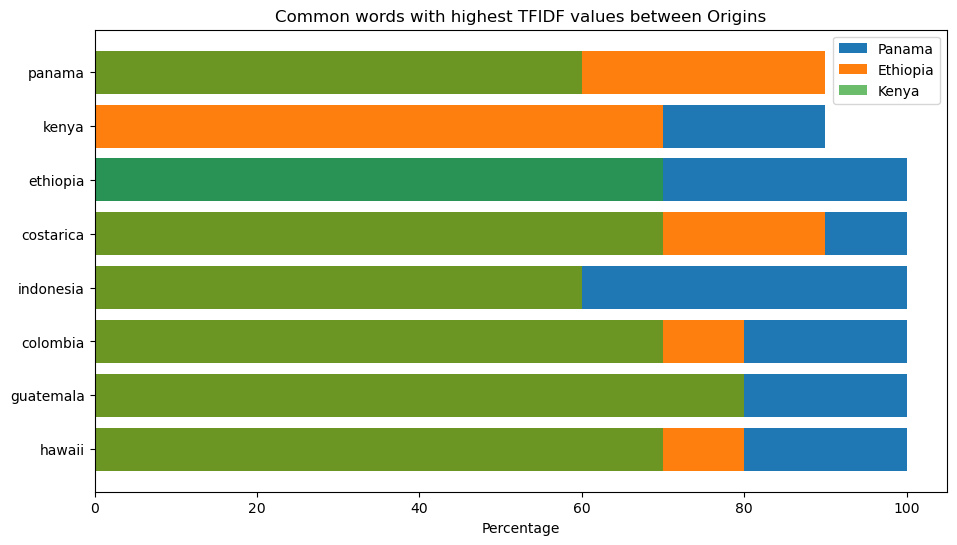

In [200]:
pltpy.figure(figsize=(11, 6))
pltpy.barh(true_labels_PAN, TFIDF_PAN_Similarity, label="Panama")
pltpy.barh(true_labels_ETH, TFIDF_ETH_Similarity, label = "Ethiopia")
pltpy.barh(true_labels_KYN, TFIDF_KNY_Similarity, alpha=0.7, label="Kenya")
pltpy.xlabel("Percentage")
pltpy.title('Common words with highest TFIDF values between Origins')
pltpy.legend()
pltpy.show()

In [43]:
Cloud_ETH = WordCloud(background_color="white", max_words=10).generate_from_frequencies(df_tfidf_eth.T.sum(axis=1))
Cloud_GUA = WordCloud(background_color="white", max_words=10).generate_from_frequencies(df_tfidf_guatemala.T.sum(axis=1))
Cloud_COL = WordCloud(background_color="white", max_words=10).generate_from_frequencies(df_tfidf_colombia.T.sum(axis=1))
Cloud_CR = WordCloud(background_color="white", max_words=10).generate_from_frequencies(df_tfidf_cr.T.sum(axis=1))
Cloud_HW = WordCloud(background_color="white", max_words=10).generate_from_frequencies(df_tfidf_hw.T.sum(axis=1))
Cloud_IND = WordCloud(background_color="white", max_words=10).generate_from_frequencies(df_tfidf_ind.T.sum(axis=1))
Cloud_KNY = WordCloud(background_color="white", max_words=10).generate_from_frequencies(df_tfidf_kenya.T.sum(axis=1))
Cloud_PAN = WordCloud(background_color="white", max_words=10).generate_from_frequencies(df_tfidf_pan.T.sum(axis=1))


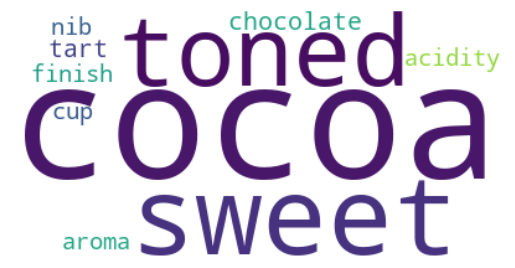

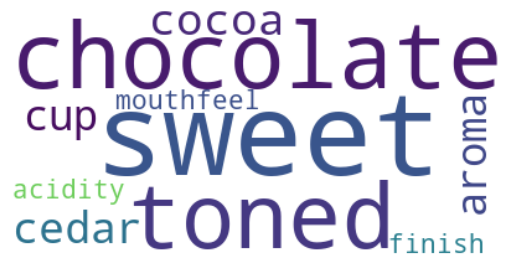

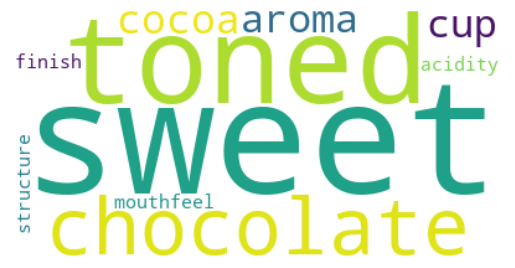

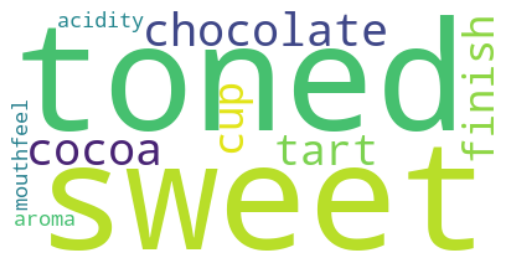

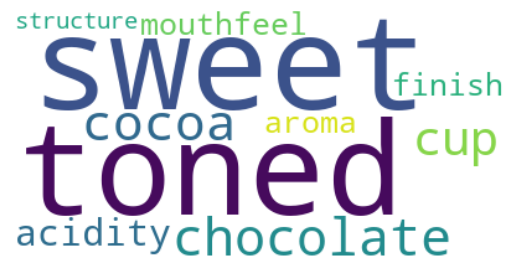

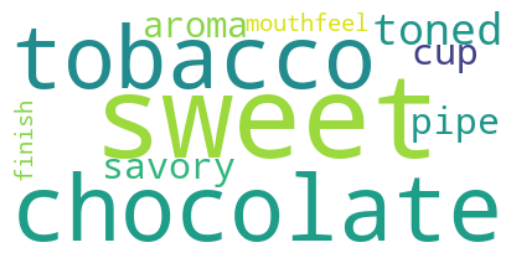

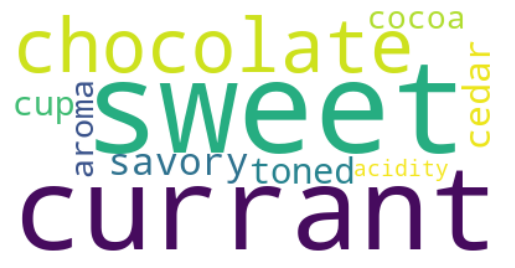

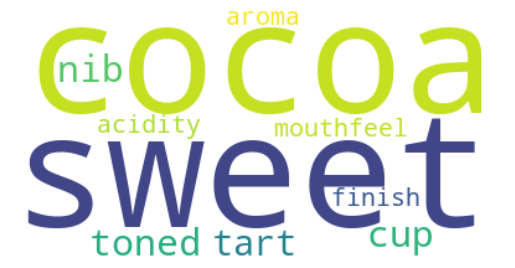

In [44]:
pltpy.figure()
pltpy.imshow(Cloud_ETH, interpolation="bilinear")
pltpy.axis("off")
pltpy.show()

pltpy.figure()
pltpy.imshow(Cloud_GUA, interpolation="bilinear")
pltpy.axis("off")
pltpy.show()

pltpy.figure()
pltpy.imshow(Cloud_COL, interpolation="bilinear")
pltpy.axis("off")
pltpy.show()

pltpy.figure()
pltpy.imshow(Cloud_CR, interpolation="bilinear")
pltpy.axis("off")
pltpy.show()

pltpy.figure()
pltpy.imshow(Cloud_HW, interpolation="bilinear")
pltpy.axis("off")
pltpy.show()

pltpy.figure()
pltpy.imshow(Cloud_IND, interpolation="bilinear")
pltpy.axis("off")
pltpy.show()

pltpy.figure()
pltpy.imshow(Cloud_KNY, interpolation="bilinear")
pltpy.axis("off")
pltpy.show()

pltpy.figure()
pltpy.imshow(Cloud_PAN, interpolation="bilinear")
pltpy.axis("off")
pltpy.show()

## Distil-Bert

#### Train Distilbert with DataCollatorWithPadding and AutomodelForSequenceClassification

In [47]:

dict_label= {v: key for key, v in label_dict.items()}
print(label_dict, "\n",dict_label)
from datasets import Dataset
input_ids_tensor = df_training_dBert[:][0].tolist()
attention_mask_tensor = df_training_dBert[:][1].tolist()
labels_tensor = df_training_dBert[:][2].tolist()

input_ids_tensor_val = df_validation_dBert[:][0].tolist()
attention_mask_tensor_val = df_validation_dBert[:][1].tolist()
labels_tensor_val = df_validation_dBert[:][2].tolist()

# Create a dictionary for each feature
training_dict = {
    "label": labels_tensor,
    "input_ids": input_ids_tensor,
    "attention_mask": attention_mask_tensor
}
validation_dict = {
    "label": labels_tensor_val,
    "input_ids": input_ids_tensor_val,
    "attention_mask": attention_mask_tensor_val
}

# Create a dataset using the Dataset class from the datasets library
trainingDisBert = Dataset.from_dict(training_dict)
validationDisBert = Dataset.from_dict(validation_dict)
# Print the resulting dataset
print("Transform the dataset to the proper Dataset dict for the trainer and dataCollator","\n",trainingDisBert,"\n" ,validationDisBert)
# input_ids_training,attention_masks_train,labels_train

{'colombia': 0, 'ethiopia': 1, 'guatemala': 2, 'costarica': 3, 'kenya': 4, 'hawaii': 5, 'panama': 6, 'indonesia': 7} 
 {0: 'colombia', 1: 'ethiopia', 2: 'guatemala', 3: 'costarica', 4: 'kenya', 5: 'hawaii', 6: 'panama', 7: 'indonesia'}
Transform the dataset to the proper Dataset dict for the trainer and dataCollator 
 Dataset({
    features: ['label', 'input_ids', 'attention_mask'],
    num_rows: 1035
}) 
 Dataset({
    features: ['label', 'input_ids', 'attention_mask'],
    num_rows: 444
})


In [55]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, AutoTokenizer, DataCollatorWithPadding
import evaluate
import accelerate
tokenizerAuto = AutoTokenizer.from_pretrained("distilbert-base-uncased")


data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# load the evalutation metric to use during training
f1Score = evaluate.load('f1')
def compute_f1metric(eval_pred):
    predictions,labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return f1Score.compute(predictions=predictions, references=labels, average="macro")

## Training 
# Inverse dictionary of the labels
dict_label=  {i: key for key, i in label_dict.items()} 

# Finetunning a model with Trainer
model_AutoDisBert = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased",
                                                                      num_labels = 8, id2label= label_dict,
                                                                      label2id= dict_label)
training_arguments = TrainingArguments(output_dir="my_awesome_model4",
                                      learning_rate=2e-5,
                                      per_device_train_batch_size=16,
                                      per_device_eval_batch_size=16,
                                      num_train_epochs=20,
                                      weight_decay=0.01,
                                      evaluation_strategy="epoch",
                                      save_strategy="epoch",
                                      load_best_model_at_end=True,
                                      push_to_hub=False)

trainer= Trainer (
    model=model_AutoDisBert,
    args= training_arguments,
    train_dataset= trainingDisBert,
    eval_dataset= validationDisBert,
    tokenizer=tokenizer,
    data_collator= data_collator,
    compute_metrics=compute_f1metric
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [56]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1
1,No log,1.831316,0.064070
2,No log,1.818643,0.064070
3,No log,1.715696,0.148610
4,No log,1.671941,0.230779
5,No log,1.609151,0.210456
6,No log,1.646726,0.232820
7,No log,1.645694,0.233313
8,1.616100,1.645515,0.246533
9,1.616100,1.692590,0.248825
10,1.616100,1.728723,0.274298


TrainOutput(global_step=1300, training_loss=1.0959444955679087, metrics={'train_runtime': 1683.1751, 'train_samples_per_second': 12.298, 'train_steps_per_second': 0.772, 'total_flos': 407070332870400.0, 'train_loss': 1.0959444955679087, 'epoch': 20.0})